# Plots and code snippets for Durack et al., CMIP Summary paper

<div style="text-align: right">
<p>
    <img src="https://pcmdi.github.io/assets/PCMDI/199x65px-PCMDI-Logo-Text-rectangle.png"
         width="91"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Program for Climate Model Diagnosis and Intercomparison"
         alt="Program for Climate Model Diagnosis and Intercomparison"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/LLNL/212px-LLNLiconPMS286-WHITEBACKGROUND.png"
         width="30"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="Lawrence Livermore National Laboratory"
         alt="Lawrence Livermore National Laboratory"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/DOE/459x127px-DOE-Logo_Color_TextOnly.png"
         width="108"
         height="30"
         class="fixed-height-image"
         style="margin-right: 20px"
         title="United States Department of Energy"
         alt="United States Department of Energy"
    >
</p>
</div>

**Summary**

The CMIP Summary paper aims to outline the history of the Model Intercomparison Project (MIP) phases, including the first AMIP1/2 activities and extending through the early CMIP1/2/2+ phases to the present with CMIP6.

**Authors**

Paul J. Durack ([durack1](https://github.com/durack1); [PCMDI](https://pcmdi.llnl.gov/), [Lawrence Livermore National Laboratory](https://www.llnl.gov/))

**Reference**

Durack, P. J., K. E. Taylor, P. J. Gleckler et al. (2025): The Coupled Model Intercomparison Project (CMIP): Reviewing project history, evolution, and future, GMD [in prep.]

**Notes**

PJD 15 Nov 2024 - Initial start, Figs 1, 5 and 6 updated<br>
PJD 15 Nov 2024 - Added Fig A1<br>
PJD 16 Nov 2024 - Added MIPSummLib<br>
PJD 18 Nov 2024 - Added updateLineColours func to MIPSummLib<br>
PJD 18 Nov 2024 - First pass figures complete<br>
PJD 19 Nov 2024 - Updating notebook tabulated information

**Links**

[Embedding SVG graphics into TeX](https://medium.com/@aaron_imn/a-quick-guide-to-use-scalable-vector-graphics-svg-on-overleaf-ca69448f7177); 
[Embedding SVGZ graphics into Overleaf](https://tex.stackexchange.com/questions/440062/how-to-use-svgz-with-includesvg); 
[Table markdown in jupyter](https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter); 
[Prevent figure label overlap: matplotlib](https://www.google.com/search?q=matplotlib+ax.barh+prevent+label+overlap)

**Notebook lookup table**

Note: Links to the sections work best when viewing this notebook via [nbviewer](https://nbviewer.org/github/durack1/CMIPSummary/blob/main/figuresAndTables.ipynb).

1. [Figure 1: Experiments, models, institutions and countries](figuresAndTables.ipynb#fig1)
1. [Figure 2: CMIP6 project growth over time](figuresAndTables.ipynb#fig2)
1. [Figure 3: Web of Science (WoS) citations for MIP overview papers](figuresAndTables.ipynb#fig3)
1. [Figure 4: Web of Science (WoS) citations for CMIP6 Community MIP papers](figuresAndTables.ipynb#fig4)
1. [Figure 5: Recorded downloads by experiment across three phases of CMIP](figuresAndTables.ipynb#fig5)
1. [Figure 6: A time history of MIPs and their broader impact](figuresAndTables.ipynb#fig6)
1. [Figure A1: Recorded downloads by MIP across three phases of CMIP](figuresAndTables.ipynb#figA1)

### imports

In [1]:
%%time
import matplotlib.pyplot as plt
import numpy as np
import copy
import datetime
import json
import os
from MIPSummLib import grabGoogleScholarCites, pullStats, updateLineColours

CPU times: user 251 ms, sys: 58.4 ms, total: 310 ms
Wall time: 396 ms


### define time

In [2]:
%%time
timeNow = datetime.datetime.now()
timeFormat = timeNow.strftime("%y%m%dT%H%M%S")
print("timeFormat:", timeFormat)

timeFormat: 241118T170837
CPU times: user 48 μs, sys: 3 μs, total: 51 μs
Wall time: 50.1 μs


### Figure 1: Experiments, models, institutions and countries <a class="anchor" id="fig1"></a>

### define input data

In [3]:
%%time
labels = ["AMIP1", "AMIP2", "CMIP1", "CMIP2", "CMIP3", "CMIP5", "CMIP6"]
experiments = [1, 1, 1, 2, 12, 37, 322]  # CMIP6 values pulled from https://github.com/WCRP-CMIP/CMIP6_CVs
models = [29, 32, 20, 17, 24, 59, 132]
institutions = [28, 25, 16, 15, 16, 26, 49]
countries = [9, 9, 8, 8, 11, 12, 26]
#forcingCounts = [2, 2, 0, 1, 15, 24, 63]  # https://docs.google.com/presentation/d/1_51Oohg4unT_W_F2xskYoOB3yIshMwxBBEnD6gIBI7Q/edit?usp=sharing
#forcingCountsBlank = np.empty(7,)
#forcingCountsBlank[:] = np.nan

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 2.86 μs


### plot

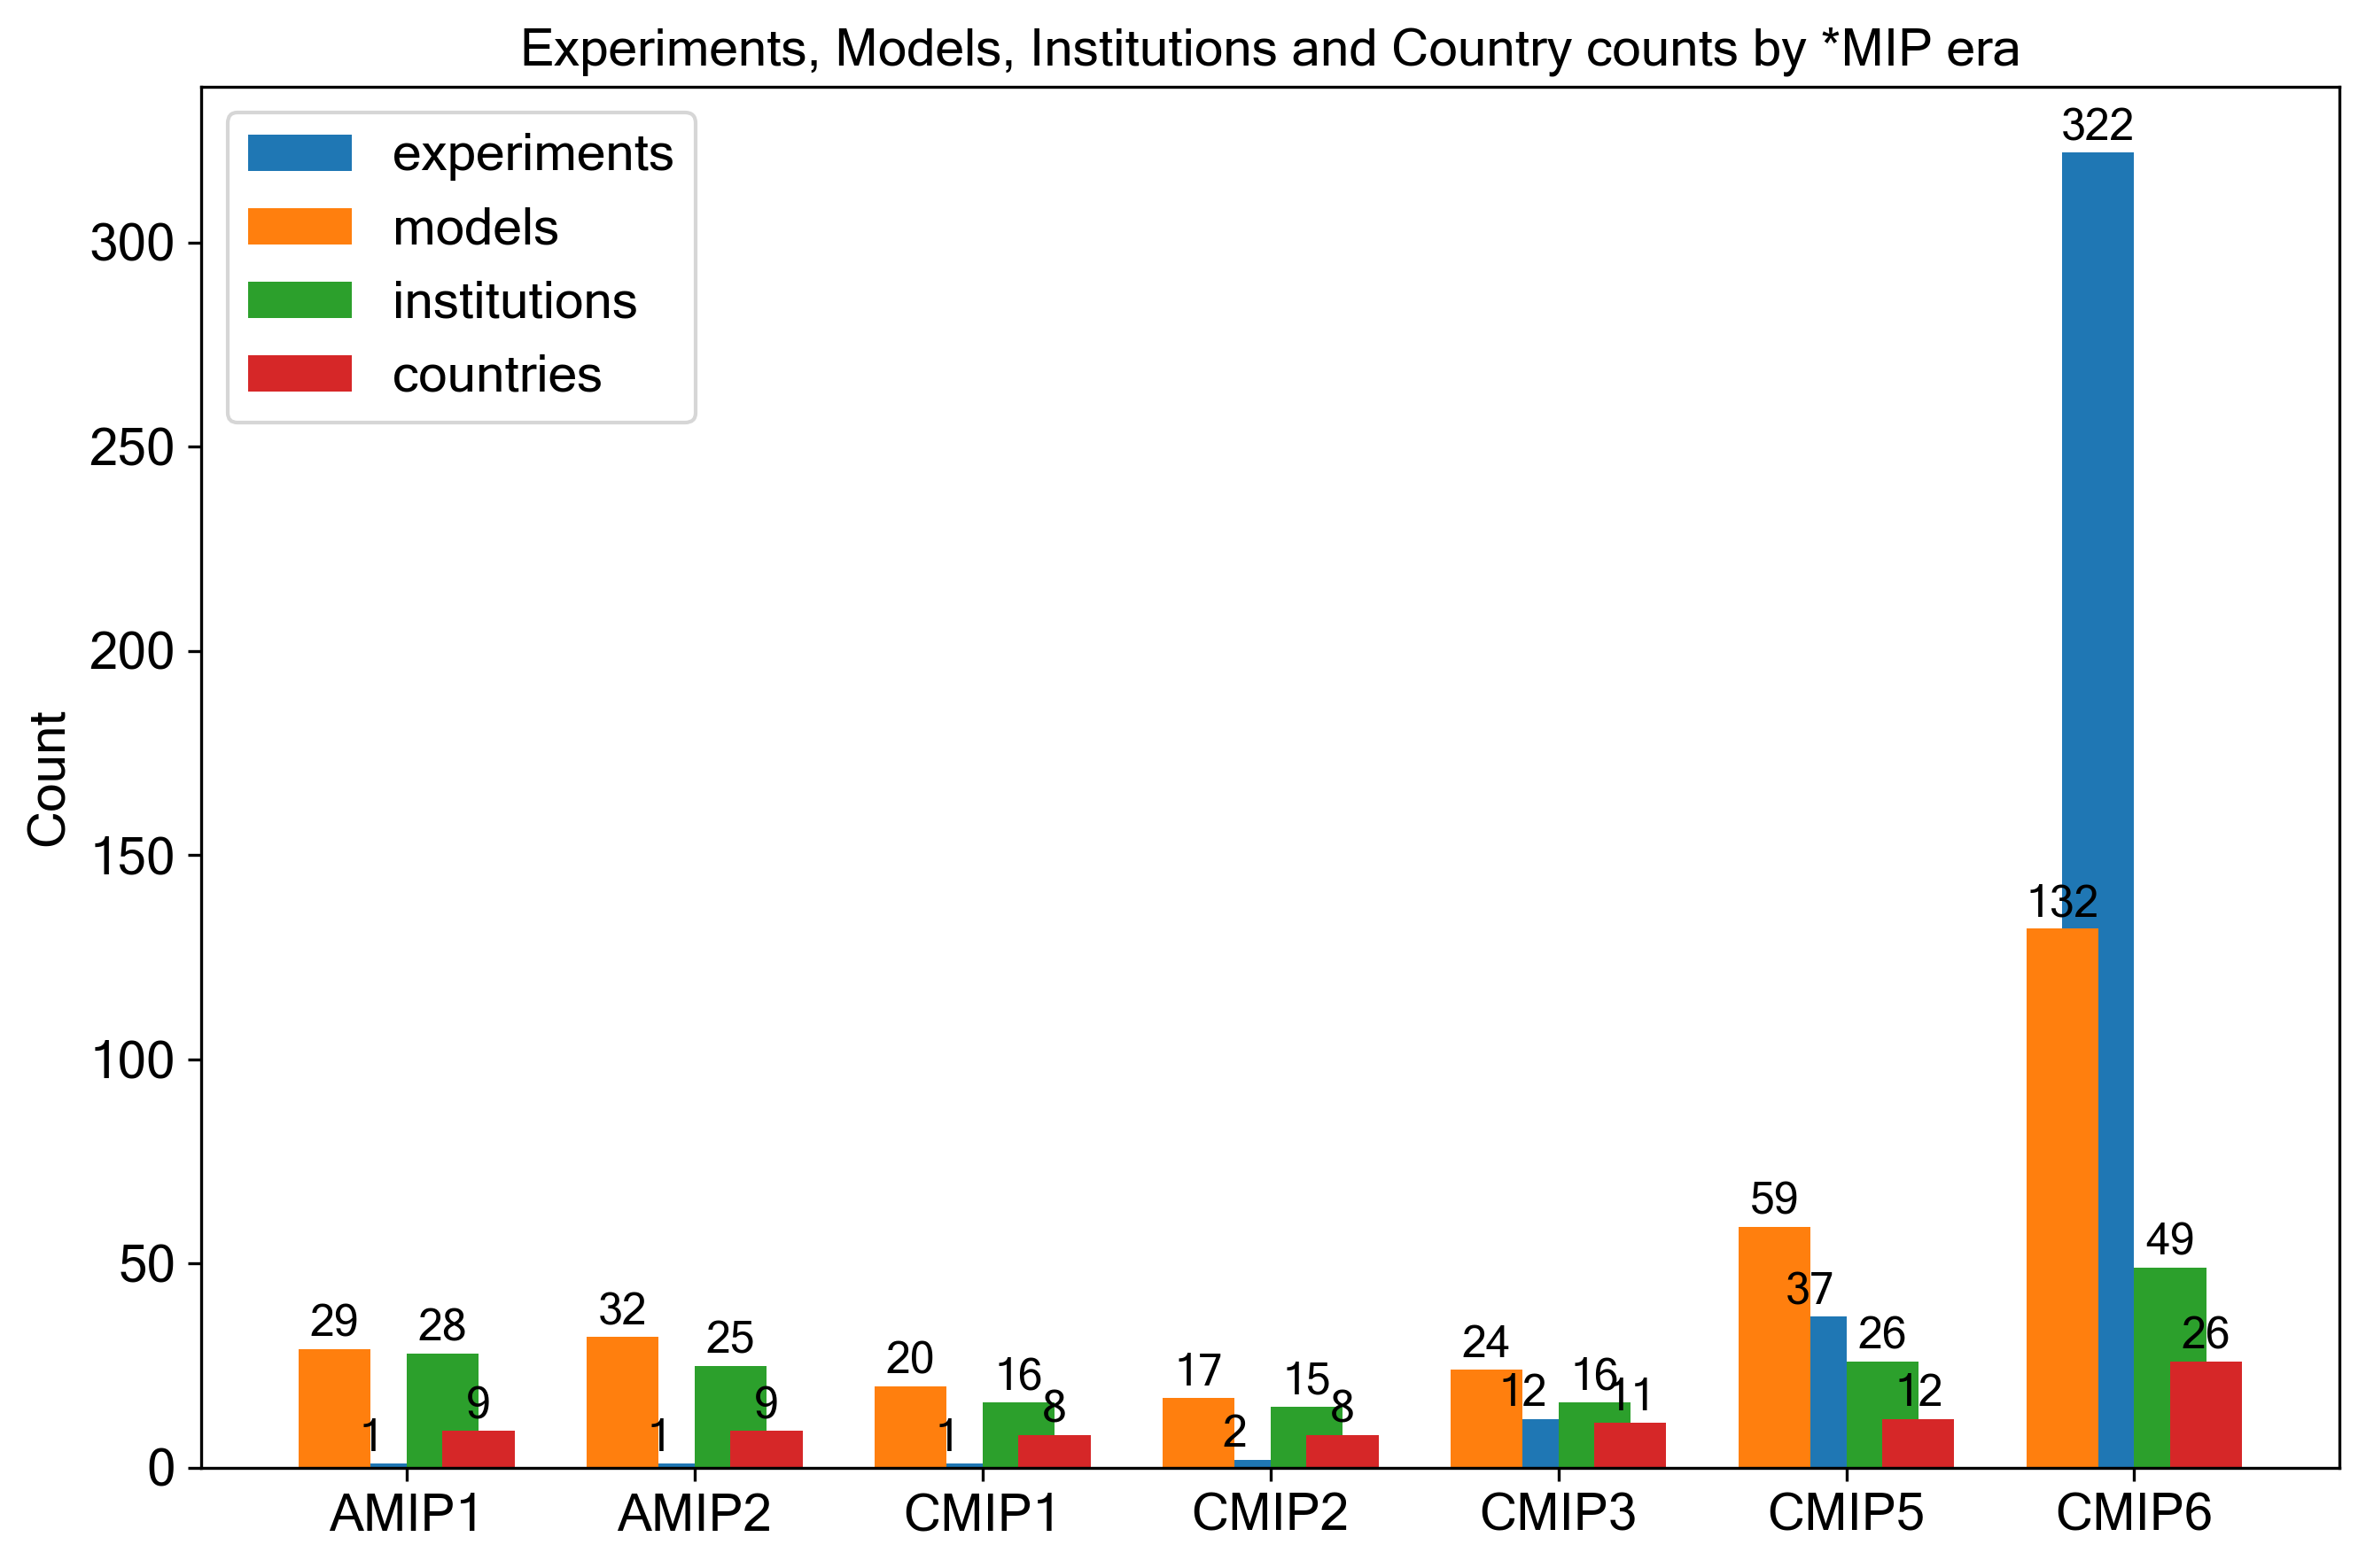

In [4]:
# set inputs
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars
fontName = "Microsoft Sans Serif"
fontSize = 14
offset = 0.5

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot
rects1 = ax.bar(x - width * offset, experiments, width, label="experiments")
rects3 = ax.bar(x - width, models, width, label="models")
rects2 = ax.bar(x + width * offset, institutions, width, label="institutions")
rects4 = ax.bar(x + width, countries, width, label="countries")
# rects5 = ax.bar(x + width*1.5, forcingCountsBlank, width, label="forcings (DECK/historical only - no *MIPs considered)")

# pretty things up - add text for labels, title, custom x-axis tick labels, etc.
ax.set_title(
    "Experiments, Models, Institutions and Country counts by *MIP era",
    fontname=fontName,
    fontsize=fontSize,
)
ax.set_ylabel("Count", fontname=fontName, fontsize=fontSize)
plt.yticks(fontname=fontName, fontsize=fontSize)
ax.set_xticks(x, labels, fontname=fontName, fontsize=fontSize)
ax.legend(prop={"family": fontName, "size": fontSize})

# label cleanup
padding = 1
labelSize = 12

ax.bar_label(rects1, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects2, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects3, padding=padding, fontname=fontName, fontsize=labelSize)
ax.bar_label(rects4, padding=padding, fontname=fontName, fontsize=labelSize)
# ax.bar_label(rects5, padding=padding, fontname=fontName, fontsize=labelSize)  # forcing

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat, "Fig1.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 2: CMIP6 project growth over time <a class="anchor" id="fig2"></a>

### process input data

In [5]:
import csv
import glob

csvFiles = glob.glob(os.path.join("241118", "*_datasets_*_footprint_CMIP6_*.csv"))
csvFiles.sort()

# create dictionary
files = {}
for count, actId in enumerate(csvFiles):
    actIdSplit = actId.split("_")
    dates = actIdSplit[-1].split("-")[-1].split(".")[0]
    year = int(dates[0:4])
    month = int(dates[4:6])
    day = int(dates[-2:])
    files[actIdSplit[-2]] = actId

actCount = len(files) + 2  # Add missing MIPs (8 DynVarMIP, 20 SIMIP)

startTime = datetime.date(2018, 7, 2)
endTime = datetime.date(int(year), int(month), int(day))
times = endTime - startTime  # days=642

dateList = [startTime + datetime.timedelta(days=x) for x in range(times.days)]
dateCount = len(dateList)

# create numpy array
arr2 = np.zeros([dateCount, actCount + 1])
for count, x in enumerate(dateList):
    arr2[count, 0] = x.toordinal()

# read CSV
offset = 0  # initialize variable
for count, filePath in enumerate(files):
    print(count, filePath, files[filePath])
    tmpTime = []
    tmpCount = []
    with open(files[filePath]) as csvfile:
        tmp = csv.reader(csvfile, delimiter=",")
        for row in tmp:
            if row[0] == "date":
                continue
            year, month, day = row[0].split("-")
            day = day.split(" ")[0]
            tmpTime.append(datetime.date(int(year), int(month), int(day)))
            tmpCount.append(row[1])

    # Compare time axes
    inds = np.intersect1d(dateList, tmpTime, assume_unique=True, return_indices=True)
    intersects, dateListInd, tmpTimeInd = inds

    if count in [0, 8, 19]:  # Deal with missing 8 DynVarMIP, 20 SIMIP
        offset = offset + 1
        print("offset:", offset)
    for dateMatch, x in enumerate(dateList):
        for dateMatch2, y in enumerate(tmpTime):
            # Catch case where times match
            if x == y:
                arr2[dateMatch, count + offset] = tmpCount[dateMatch2]
                break
            # Catch case where no match, use previous timestamp value
            elif dateMatch2 == len(tmpTime) - 1:
                arr2[dateMatch, count + offset] = arr2[dateMatch - 1, count + offset]

print("input CMIP6 publication data processed")

0 CMIP6 241118/241118_esgf_datasets_publication_cumulative_data_footprint_CMIP6_20180701-20241118.csv
offset: 1
1 AerChemMIP 241118/241118_esgf_datasets_publication_cumulative_data_footprint_CMIP6_AerChemMIP_20180701-20241118.csv
2 C4MIP 241118/241118_esgf_datasets_publication_cumulative_data_footprint_CMIP6_C4MIP_20180701-20241118.csv
3 CDRMIP 241118/241118_esgf_datasets_publication_cumulative_data_footprint_CMIP6_CDRMIP_20180701-20241118.csv
4 CFMIP 241118/241118_esgf_datasets_publication_cumulative_data_footprint_CMIP6_CFMIP_20180701-20241118.csv
5 CMIP 241118/241118_esgf_datasets_publication_cumulative_data_footprint_CMIP6_CMIP_20180701-20241118.csv
6 DAMIP 241118/241118_esgf_datasets_publication_cumulative_data_footprint_CMIP6_DAMIP_20180701-20241118.csv
7 DCPP 241118/241118_esgf_datasets_publication_cumulative_data_footprint_CMIP6_DCPP_20180701-20241118.csv
8 FAFMIP 241118/241118_esgf_datasets_publication_cumulative_data_footprint_CMIP6_FAFMIP_20180701-20241118.csv
offset: 2
9 GM

### plot

PBe15: 1125899906842624
TBe15: 1099511627776
yticks: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
ylabels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
CMIP6 total 'latest' datasets (TeraByte, 1e12): 12188
dateList[0]: 2018-07-02


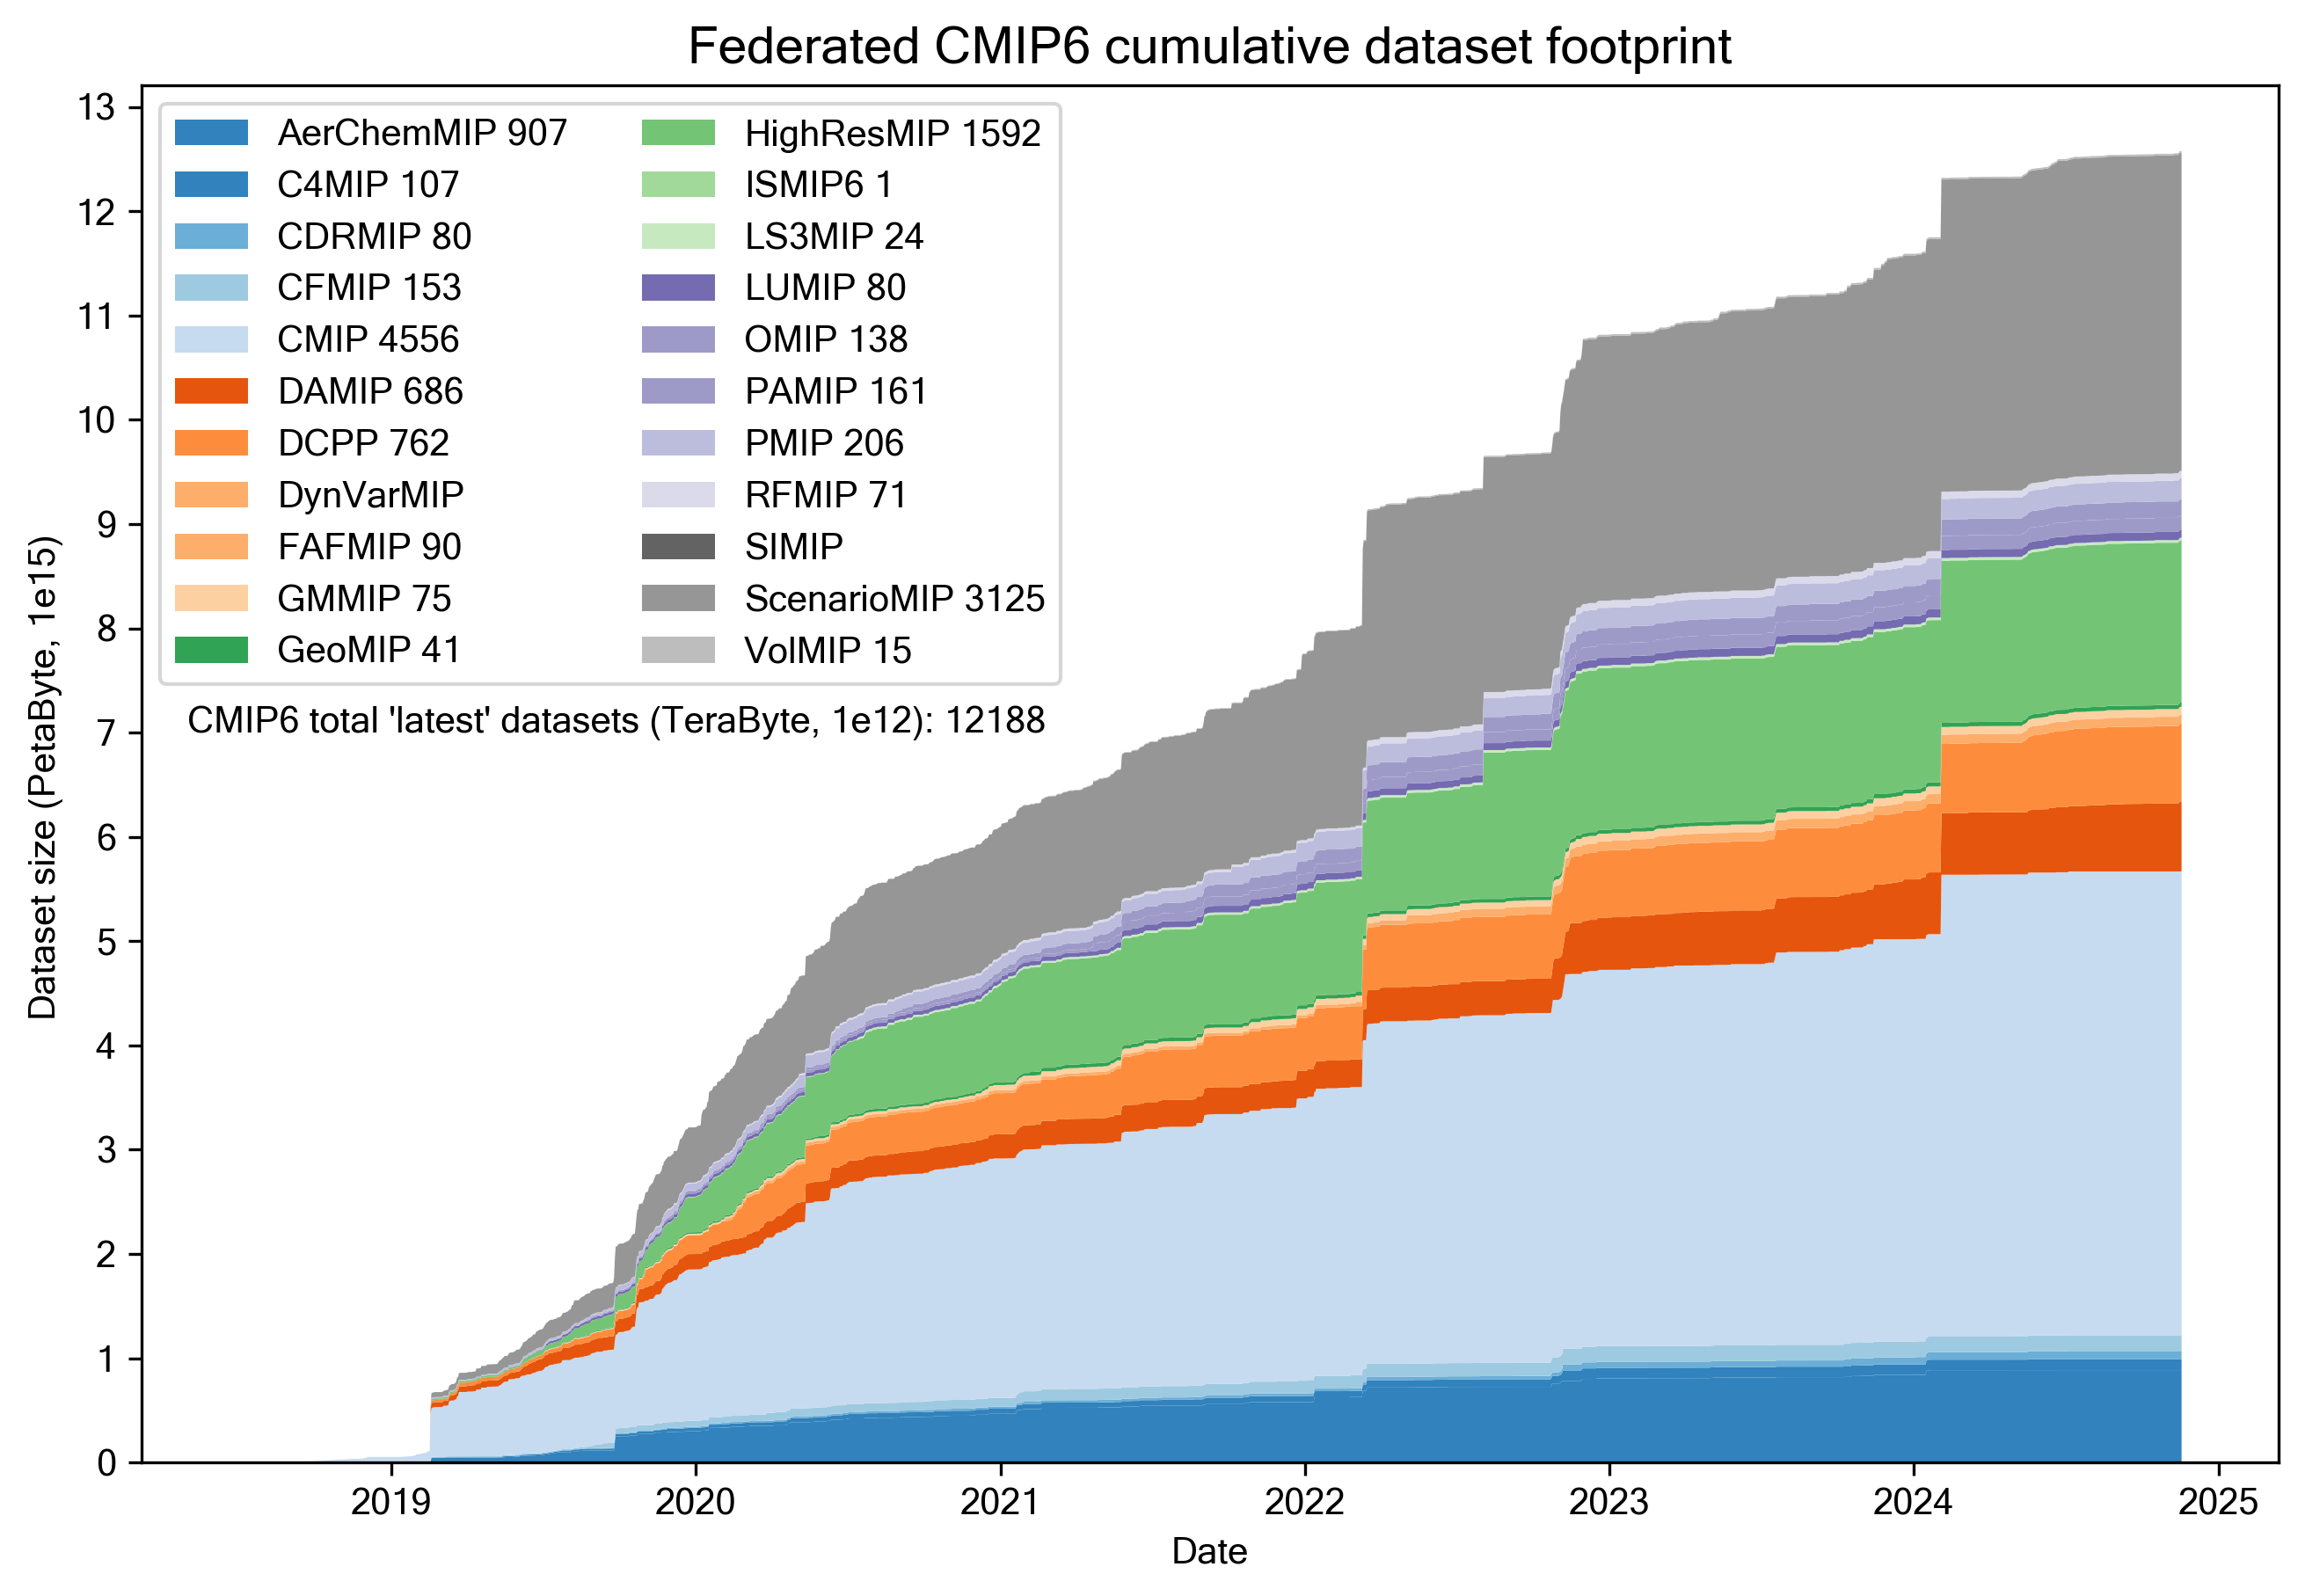

In [6]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, date2num

fontName = "Microsoft Sans Serif"
xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

# Setup variables
# time axis and arrays
x = date2num(dateList)
y = arr2[:, 2:]  # Omit CMIP6 cumulative
PBe15 = np.power(1024, 5)  # replace 1e15
print("PBe15:", PBe15)
TBe12 = np.power(1024, 4)  # replace 1e12
print("TBe15:", TBe12)
y = y / PBe15  # 1e15  # Scale from bytes to PB 10^15
y = y.swapaxes(0, 1)

# Legend labels
actLabels = []
offset = 1
for count, val in enumerate(list(files.keys())):
    if val == "CMIP6":
        continue  # Skip totals
    if count == 8:
        actLabels.append("DynVarMIP")
        offset = offset + 1
        pass
    if count == 19:
        actLabels.append("SIMIP")
        offset = offset + 1
        pass

    actLabels.append(" ".join([val, str(int(arr2[-1, count + offset] / TBe12))]))

# Basic stacked area chart.
fig = plt.figure(figsize=(9, 6), dpi=300)  # Defaults to 6.4,4.8
ax = plt.subplot(1, 1, 1)
ax.xaxis.set_major_locator(xtick_locator)
ax.xaxis.set_major_formatter(xtick_formatter)

# Create colour lookup
# https://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib
NUM_COLORS = 23
colList = []
# https://matplotlib.org/tutorials/colors/colormaps.html#classes-of-colormaps
cm = plt.get_cmap("gist_rainbow")
cm = plt.get_cmap("tab20c")  # also tab 20b, tab20
for i in range(NUM_COLORS):
    colList.append(cm(1.0 * i / NUM_COLORS))
plt.stackplot(x, y, labels=actLabels, colors=colList)
leg2 = plt.legend(loc="upper left", ncol=2, prop={"family": fontName, "size": 10})
title = "".join(
    [
        "Federated CMIP6 cumulative dataset footprint"  # (Updated: ",
        # timeNow.strftime("%Y-%m-%d"),
        # ")",
    ]
)
ax.set_title(
    title,
    fontname=fontName,
    fontsize=fontSize,
)
plt.xlabel("Date", fontname=fontName)
plt.ylabel("Dataset size (PetaByte, 1e15)", fontname=fontName)
yticks = np.arange(0, 14, 1)
ylabels = []

for count, val in enumerate(yticks):
    ylabels.append(val)
print("yticks:", yticks)
print("ylabels:", ylabels)
plt.xticks(fontname=fontName)
plt.yticks(yticks, ylabels, fontname=fontName)
plt.subplots_adjust(left=0.06, right=0.96, bottom=0.08, top=0.95, wspace=0, hspace=0)
anoStr = "".join(
    ["CMIP6 total 'latest' datasets (TeraByte, 1e12): ", str(int(arr2[-1, 1] / TBe12))]
)
print(anoStr)
dateTweak = date2num(datetime.date(2018, 5, 1))
datasetNumTweak = 7
plt.annotate(
    anoStr,
    xy=(dateTweak, datasetNumTweak),
    xytext=(dateTweak, datasetNumTweak),
    fontname=fontName,
)
print("dateList[0]:", dateList[0])
fig.savefig("_".join([timeFormat, "Fig2.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 3: Web of Science (WoS) citations for MIP overview papers <a class="anchor" id="fig3"></a>

### pull data - Overview and ARs

In [7]:
%%time
# create a filled pad list based on FANGIO 1990 published, 1991 citation to present
currentYr = datetime.date.today().year
tmp = np.arange(1990, currentYr+1)
citingYrsPad = [np.nan]*len(tmp) 

data = {
    "key": ["strId", "DOI", "WoSId", "GSchId"],
    "charneyG": ["US Nat. Res. Counc. (Charney et al., 1979)", "10.17226/12181", "", "15553179873625400927"],
    "fangio": ["FANGIO (Cess et al., 1990)", "10.1029/JD095iD10p16601", "A1990EB20200022", "6135992129360534519"],
    "ar1": ["FAR Ch4 (Gates et al., 1990)", "", "000519742200007", "7713434728424104172"],
    "amip1": ["AMIP1 (Gates et al., 1992)", "10.1175/1520-0477(1992)073<1962:ATAMIP>2.0.CO;2", "A1992KD66500003", "7578705778036429828"],
    "cmip1": ["CMIP1 (Meehl et al., 1995)", "10.1175/1520-0477-76.6.951", "A1995RG21000008", "4747560697990877468"],
    "ar2": ["SAR Ch5 (Gates et al., 1995)", "", "000538713700009", "16792993830758929937"],
    "ar3": ["TAR Ch8 (McAvaney et al., 2001)", "", "000538687900012", "14462291162561266477"],
    "cmip2": ["CMIP2 (Meehl et al., 2005)", "10.1175/BAMS-86-1-89", "000226970100024", "414872318861866058"],
    "cmip3": ["CMIP3 (Meehl et al., 2007)", "10.1175/BAMS-88-9-1383", "000250166400004", "10102268002781422381"],
    "ar4": ["AR4 Ch8 (Randall et al., 2007)", "", "000538686200012", "14750900660436683651"],
    "cmip5": ["CMIP5 (Taylor et al., 2012)", "10.1175/BAMS-D-11-00094.1", "000303110900004", "6589368678432360376"],
    "ar5": ["AR5 Ch9 (Flato et al., 2013)", "10.1017/CBO9781107415324.020", "000368114000013", "6766149182177097103"],
    "cmip6": ["CMIP6 (Eyring et al., 2016)", "10.5194/gmd-9-1937-2016", "000376937800013", "5319430665468485905"],
    "ar6": ["AR6 Ch3 (Eyring et al., 2021)", "10.1017/9781009157896.005", "", "1626781721612853877"],
}

dataDic = {}
for count, key in enumerate(data.keys()):
    if key == "key":
        continue
    dataDic[key] = {}
    if key in ["charneyG", "ar6"]:
        dataDic[key]["wos"] = []
        dataDic[key]["wosPad"] = []
        gcites = grabGoogleScholarCites(data[key][3])
        dataDic[key]["gsch"] = gcites
        continue
    print(count, key)
    # process WoS requests
    _, _, noPad, pad, _ = pullStats(data[key][2], data[key][1], citingYrsPad)
    dataDic[key]["wos"] = noPad
    dataDic[key]["wosPad"] = pad
    gcites = grabGoogleScholarCites(data[key][3])
    dataDic[key]["gsch"] = gcites

"""
Notes
# Charney National Research Council, 1979 National Academies Press
# https://doi.org/10.17226/12181
# https://scholar.google.com/scholar?cluster=15553179873625400927&hl=en&as_sdt=0,5
charneyG = grabGoogleScholarCites("10.17226/12181")
# FANGIO Cess et al., 1990 JGR
# https://doi.org/10.1029/JD095iD10p16601
# https://www.webofscience.com/wos/woscc/full-record/WOS:A1990EB20200022
# https://scholar.google.com/scholar?cluster=6135992129360534519&hl=en&as_sdt=0,5
_, _, fangioNoPad, fangio, _ = pullStats("A1990EB20200022", "10.1029/JD095iD10p16601", citingYrsPad)
#fangioG = grabGoogleScholarCites("10.1029/JD095iD10p16601")
"""
print("Fangio, AMIP, CMIP phases, ARs data pull complete")

Processing GS: API allocation exceeded
2 fangio
Processing WoS: CESS et al. 1990
Processing GS: API allocation exceeded
3 ar1
Processing WoS: Gates et al. 1990
Processing GS: API allocation exceeded
4 amip1
Processing WoS: GATES  1992
Processing GS: API allocation exceeded
5 cmip1
Processing WoS: MEEHL  1995
Processing GS: API allocation exceeded
6 ar2
Processing WoS: Gates et al. 1995
Processing GS: API allocation exceeded
7 ar3
Processing WoS: McAvaney et al. 2001
Processing GS: API allocation exceeded
8 cmip2
Processing WoS: Meehl et al. 2005
Processing GS: API allocation exceeded
9 cmip3
Processing WoS: Meehl et al. 2007
Processing GS: API allocation exceeded
10 ar4
Processing WoS: Randall et al. 2007
Processing GS: API allocation exceeded
11 cmip5
Processing WoS: Taylor et al. 2012
Processing GS: API allocation exceeded
12 ar5
Processing WoS: Flato et al. 2014
Processing GS: API allocation exceeded
13 cmip6
Processing WoS: Eyring et al. 2016
Processing GS: API allocation exceeded


### pull data - Community MIPs

In [8]:
%%time
# create a filled pad list based on FANGIO 1990 published, 1991 citation to present
currentYr = datetime.date.today().year
tmp = np.arange(1990, currentYr+1)
citingYrsPad = [np.nan]*len(dataDic["fangio"]["wosPad"])
# CMIP6 MIPs - https://gmd.copernicus.org/articles/special_issue590.html + CDRMIP + ?
data = {
    "key": ["strId", "DOI", "WoSId", "GSchId"],
    "aerchemmip": ["AerChemMIP (Collins et al., 2017)", "10.5194/gmd-10-585-2017", "000395391000001", "2228431425692054239"],
    "c4mip": ["C4MIP (Jones et al., 2016)", "10.5194/gmd-9-2853-2016", "000383844500002", "15965828944833123479"],
    "cdrmip": ["CDRMIP (Keller et al., 2018)", "10.5194/gmd-11-1133-2018", "000428836100001", "15005249820465140731"],
    "cfmip": ["CFMIP (Webb et al., 2017)", "10.5194/gmd-10-359-2017", "000395187500001", "5130787364716430992"],  # first entry str, fix
    "cordex": ["CORDEX (Gutowski et al., 2016)", "10.5194/gmd-9-4087-2016", "000387989000001", "16396424795090846989"],
    "damip": ["DAMIP (Gillett et al., 2016)", "10.5194/gmd-9-3685-2016", "000386585100001", "939511170020131986"],
    "dcpp": ["DCPP (Boer et al., 2016)", "10.5194/gmd-9-3751-2016", "000387064200001", "4358958571700544295"],
    "dynvarmip": ["DynVarMIP (Gerber & Manzini, 2016)", "10.5194/gmd-9-3413-2016", "000384624000001", "3382763899960592148"],
    "fafmip": ["FAFMIP (Gregory et al., 2016)", "10.5194/gmd-9-3993-2016", "000387988500001", "7225289619110837959"],
    "geomip6": ["GeoMIP6 (Kravitz et al., 2015)", "10.5194/gmd-8-3379-2015", "000364326200024", "8582100925734170406"],
    "gmmip": ["GMMIP (Zhou et al., 2016)", "10.5194/gmd-9-3589-2016", "000385387800001", "9914773987014836629"],
    "highresmip": ["HighResMIP (Haarsma et al., 2016)", "10.5194/gmd-9-4185-2016", "000388191000002", "8351405550326088024"],
    "ismip6": ["ISMIP6 (Nowicki et al., 20176)", "10.5194/gmd-9-4521-2016", "000391579600002", "8537877691920472431"],
    "ls3mip": ["LS3MIP (van den Hurk et al., 2016)", "10.5194/gmd-9-2809-2016", "000383800400002", "17977350563028557335"],
    "lumip": ["LUMIP (Lawrence et al., 2016)", "10.5194/gmd-9-2973-2016", "000383892800002", "10557369061243505767"],
    "omip": ["OMIP-Phys. (Griffies et al., 2016)", "10.5194/gmd-9-3231-2016", "000384321500001", "3376941097491308409"],  # first entry str, fix
    "omip2": ["OMIP-BGC (Orr et al., 2017)", "10.5194/gmd-10-2169-2017", "000403231800001", "1338574606670727279"],
    "pamip": ["PAMIP (Smith et al., 2019)", "10.5194/gmd-12-1139-2019", "000462352700002", "3209841521107572530"],
    "pmip4": ["PMIP4 (Kageyama et al., 2018)", "10.5194/gmd-11-1033-2018", "000427841800004", "4430255073988038523"],
    #"pmip4-2": ["PMIP4-2 (Otto-Bliesner et al., 2017)", "10.5194/gmd-10-3979-2017", "", "2244946372481121692"],
    #"pmip4-3": ["PMIP4-3 (Jungclaus et al., 2017)", "10.5194/gmd-10-4005-2017", "", "9830116883221272631"],
    #"pmip4-4": ["PMIP4-4 (Kageyama et al., 2017)", "10.5194/gmd-10-4035-2017", "", "11445150179100991970"],
    #"pmip4-5": ["PMIP4-5 (Kageyama et al., 2021)", "10.5194/cp-17-1065-2021", "", "8634300561675875587"],
    "rfmip": ["RFMIP (Pincus et al., 2016)", "10.5194/gmd-9-3447-2016", "000385385300001", "17546430196727116618"],
    "scenariomip": ["ScenarioMIP (O'Neill et al., 2016)", "10.5194/gmd-9-3461-2016", "000385385700001", "12254973154230284458"],
    "simip": ["SIMIP (Notz et al., 2016)", "10.5194/gmd-9-3427-2016", "000384624000002", "15593573766407982237"],
    "viacsab": ["VIACS AB (Ruane et al., 2016)", "10.5194/gmd-9-3493-2016", "000385386000002", "6116334735342527444"],
    "volmip": ["VolMIP (Zanchettin et al., 2016)", "10.5194/gmd-9-2701-2016", "000383794200001", "3384046088338006252"],
    "zecmip": ["ZECMIP (Collins et al., 2019)", "10.5194/gmd-12-4375-2019", "000490550000001", "12415058673140439655"],
    "covidmip": ["CovidMIP (Lamboll et al., 2021)", "10.5194/gmd-14-3683-2021", "000665538700002", "15712557263970835869"],
    "covidmip2": ["CovidMIP (Jones et al., 2021)", "10.1029/2020GL091883", "000672324900006", "4763600016023344623"],  # gsch issue, use DOI
}

for count, key in enumerate(data.keys()):
    if key == "key":
        continue
    dataDic[key] = {}
    print(count, key)
    # process WoS requests
    _, _, noPad, pad, _ = pullStats(data[key][2], data[key][1], citingYrsPad)
    dataDic[key]["wos"] = noPad
    dataDic[key]["wosPad"] = pad
    gcites = grabGoogleScholarCites(data[key][3])
    dataDic[key]["gsch"] = gcites

print("CMIP6 Community MIP data pull complete")

1 aerchemmip
Processing WoS: Collins et al. 2017
Processing GS: API allocation exceeded
2 c4mip
Processing WoS: Jones et al. 2016
Processing GS: API allocation exceeded
3 cdrmip
Processing WoS: Keller et al. 2018
Processing GS: API allocation exceeded
4 cfmip
Processing WoS: Webb et al. 2017
Processing GS: API allocation exceeded
5 cordex
Processing WoS: Gutowski et al. 2016
Processing GS: API allocation exceeded
6 damip
Processing WoS: Gillett et al. 2016
Processing GS: API allocation exceeded
7 dcpp
Processing WoS: Boer et al. 2016
Processing GS: API allocation exceeded
8 dynvarmip
Processing WoS: Gerber et al. 2016
Processing GS: API allocation exceeded
9 fafmip
Processing WoS: Gregory et al. 2016
Processing GS: API allocation exceeded
10 geomip6
Processing WoS: Kravitz et al. 2015
Processing GS: API allocation exceeded
11 gmmip
Processing WoS: Zhou et al. 2016
Processing GS: API allocation exceeded
12 highresmip
Processing WoS: Haarsma et al. 2016
Processing GS: API allocation exce

In [9]:
# dataDic["covidmip2"]["CMgsch"] = None
# dataDic
# for count,key in enumerate(dataDic.keys()):
#    print(count, key)
#    if "CMgsch" in dataDic[key].keys():
#        print(dataDic[key].keys())
#        dataDic[key]["gsch"] = dataDic[key]["CMgsch"]
#        dataDic[key].pop("CMgsch")
#        dataDic[key]["wos"] = dataDic[key]["CMwos"]
#        dataDic[key].pop("CMwos")
#        dataDic[key]["wosPad"] = dataDic[key]["CMwosPad"]
#        dataDic[key].pop("CMwosPad")

In [10]:
# write data to tmp.json
# with open("241118a.json", "w") as f:
#    json.dump(dataDic, f, ensure_ascii=True, sort_keys=True, indent=4, separators=(",", ":"), default=str). # default=str forces int64 writes
# np.cumsum(data["wosPad"][11]) - Flato et al 2013
# cmip6Comp = [np.nan]*len(data["fangio"]["wosPad"])

### plot

cmip6Comp: 7027.0 [ 113.  288.  394.  569.  858. 1050. 1245. 1306. 1182.   22.   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
cmip6CompA: 13144.0 [ 136.  348.  506.  725. 1406. 1998. 2588. 2790. 2625.   22.   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
cmip6Comp: 7005.0 [ 113.  288.  394.  569.  858. 1050. 1245. 1306. 1182.   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
cmip6CompA: 13122.0 [ 136.  348.  506.  725. 1406. 1998. 2588. 2790. 2625.   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]


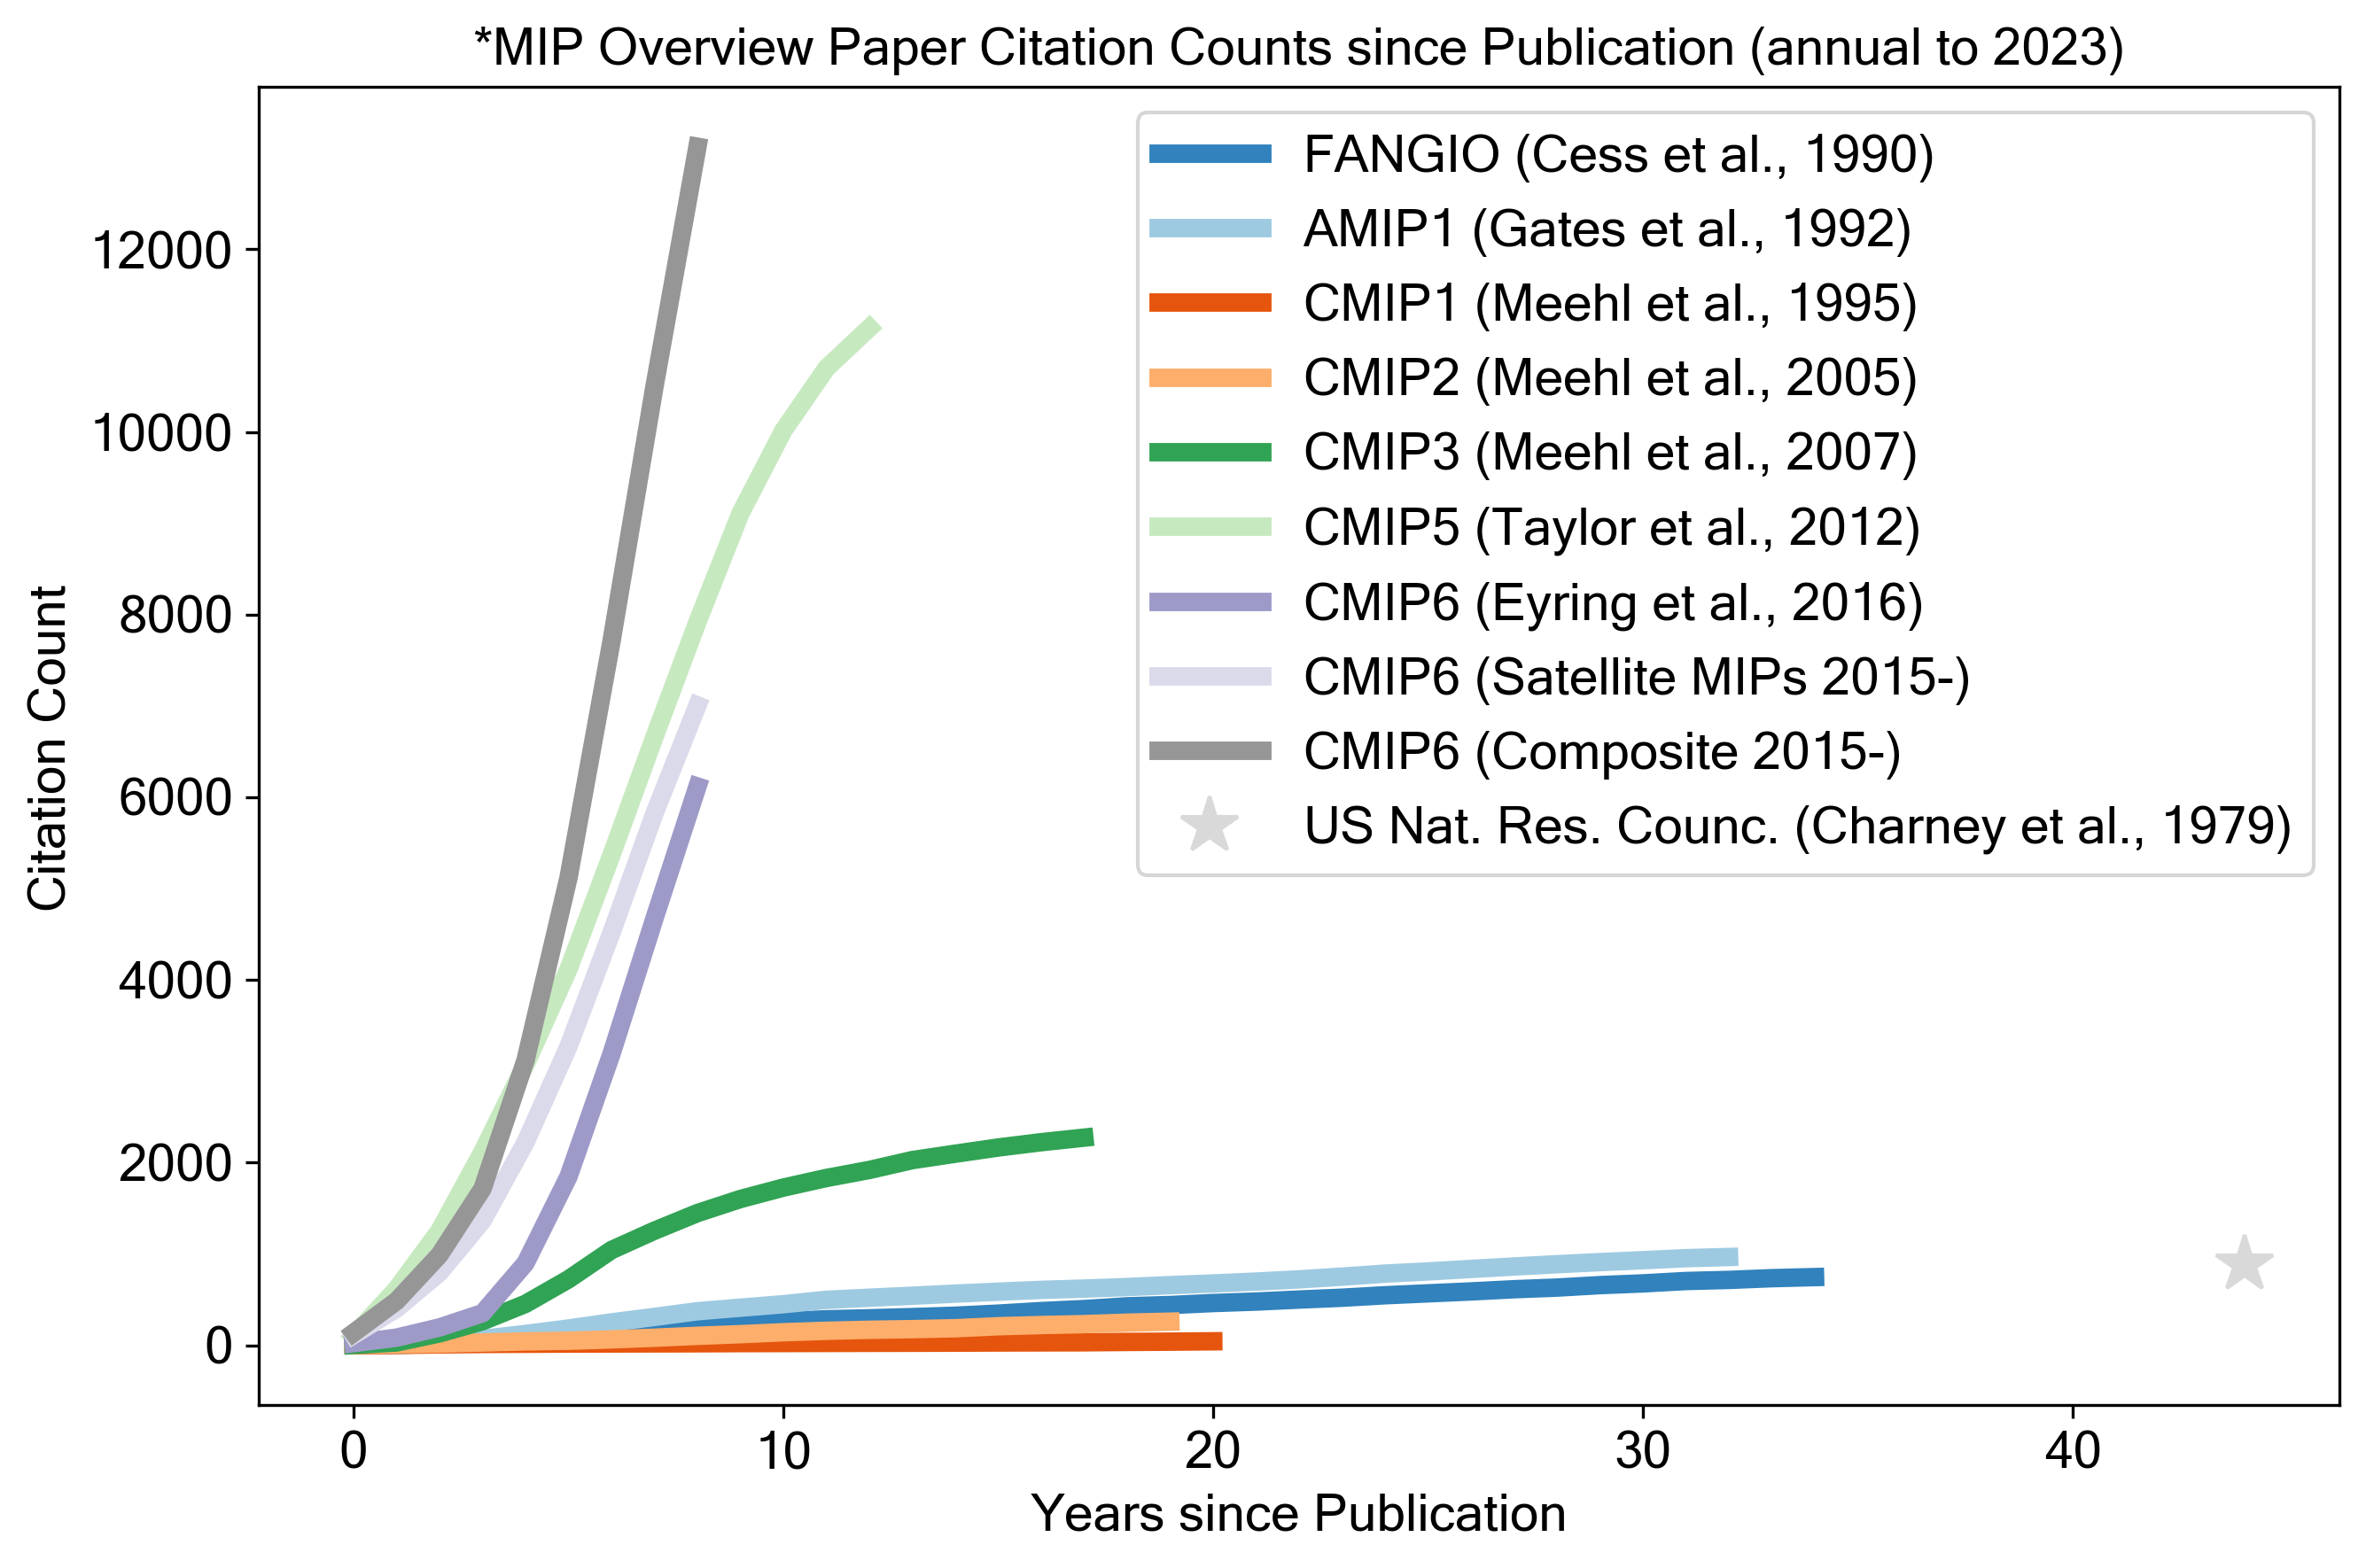

In [11]:
# set inputs
with open("241118a.json", "r") as f:
    data = json.load(f)

# set figure defaults
fontSize = 14
lineWidth = 5
fontName = "Microsoft Sans Serif"
currentYr = datetime.date.today().year
# get colour map
cm = plt.get_cmap("tab20c")

# Year since publication - based on longest
yrSincePublication = np.arange(0, len(data["fangio"]["wosPad"]))

# create CMIP6 Community MIPs, Composite totals
mipList = [
    "aerchemmip",
    "c4mip",
    "cdrmip",
    "cfmip",
    "cordex",
    "damip",
    "dcpp",
    "dynvarmip",
    "fafmip",
    "geomip6",
    "gmmip",
    "highresmip",
    "ismip6",
    "ls3mip",
    "lumip",
    "omip",
    "omip2",
    "pamip",
    "pmip4",
    "rfmip",
    "scenariomip",
    "simip",
    "viacsab",
    "volmip",
    "zecmip",
    "covidmip",
    "covidmip2",
]

# Generate composite CMIP6
cmip6Comp, cmip6Compa = [[np.nan] * len(data["fangio"]["wosPad"]) for _ in range(2)]
for count, key in enumerate(mipList):
    # print(count, key)
    # print("cmip6Comp:", len(cmip6Comp), cmip6Comp)
    # print("data[key][""wosPad""]:", len(data[key]["wosPad"]), data[key]["wosPad"])
    cmip6Comp = np.nansum([cmip6Comp, data[key]["wosPad"]], 0)

cmip6Compa[: len(cmip6Comp)] = cmip6Comp
cmip6Comp = cmip6Compa
del cmip6Compa
cmip6CompA = np.nansum([data["cmip6"]["wosPad"], cmip6Comp], 0)
cmip6Comp = np.array(cmip6Comp)
cmip6Comp = np.where(cmip6Comp == 0.0, np.nan, cmip6Comp)
cmip6CompA = np.where(cmip6CompA == 0.0, np.nan, cmip6CompA)
print("cmip6Comp:", np.nansum(cmip6Comp), cmip6Comp)
print("cmip6CompA:", np.nansum(cmip6CompA), cmip6CompA)
# cleanup leaked 2024 values
cmip6Comp[9] = np.nan
cmip6CompA[9] = np.nan
print("cmip6Comp:", np.nansum(cmip6Comp), cmip6Comp)
print("cmip6CompA:", np.nansum(cmip6CompA), cmip6CompA)

# initialize canvas
fig, ax = plt.subplots(figsize=(9, 6), dpi=300)

# plot from year 1
line0 = plt.plot(
    yrSincePublication,
    np.cumsum(data["fangio"]["wosPad"]),
    linewidth=lineWidth,
    label="FANGIO (Cess et al., 1990)",
)  #
# lineA = plt.plot(yrSincePublication, np.cumsum(data["ar1"]["wosPad"]), linewidth=lineWidth, label="FAR (Gates et al., 1990)") # 55 - missing most years
line1 = plt.plot(
    yrSincePublication,
    np.cumsum(data["amip1"]["wosPad"]),
    linewidth=lineWidth,
    label="AMIP1 (Gates et al., 1992)",
)  #
line2 = plt.plot(
    yrSincePublication,
    np.cumsum(data["cmip1"]["wosPad"]),
    linewidth=lineWidth,
    label="CMIP1 (Meehl et al., 1995)",
)  #
# lineB = plt.plot(yrSincePublication, np.cumsum(data["ar2"]["wosPad"]), linewidth=lineWidth, label="SAR (Gates et al., 1995)") # 23 - missing most years
# lineC = plt.plot(yrSincePublication, np.cumsum(data["ar3"]["wosPad"]), linewidth=lineWidth, label="TAR (McAvaney et al., 2001)") # 154 - missing most years
line3 = plt.plot(
    yrSincePublication,
    np.cumsum(data["cmip2"]["wosPad"]),
    linewidth=lineWidth,
    label="CMIP2 (Meehl et al., 2005)",
)  #
line4 = plt.plot(
    yrSincePublication,
    np.cumsum(data["cmip3"]["wosPad"]),
    linewidth=lineWidth,
    label="CMIP3 (Meehl et al., 2007)",
)  #
# lineD = plt.plot(yrSincePublication, np.cumsum(data["ar4"]["wosPad"]), linewidth=lineWidth, label="AR4 (Randall et al., 2007)") # 292 - missing most years
line5 = plt.plot(
    yrSincePublication,
    np.cumsum(data["cmip5"]["wosPad"]),
    linewidth=lineWidth,
    label="CMIP5 (Taylor et al., 2012)",
)  #
# lineE = plt.plot(yrSincePublication, np.cumsum(data["ar5"]["wosPad"]), linewidth=lineWidth, label="AR5 (Flato et al., 2013)") # 974 - missing most years
line6 = plt.plot(
    yrSincePublication,
    np.cumsum(data["cmip6"]["wosPad"]),
    linewidth=lineWidth,
    label="CMIP6 (Eyring et al., 2016)",
)  #
line7 = plt.plot(
    yrSincePublication,
    np.cumsum(cmip6Comp),
    linewidth=lineWidth,
    label="CMIP6 (Satellite MIPs 2015-)",
)
line8 = plt.plot(
    yrSincePublication,
    np.cumsum(cmip6CompA),
    linewidth=lineWidth,
    label="CMIP6 (Composite 2015-)",
)
star0 = plt.plot(
    2023 - 1979,
    data["charneyG"]["gsch"],
    marker="*",
    markersize=16,
    linestyle="None",
    label="US Nat. Res. Counc. (Charney et al., 1979)",
)  #

updateLineColours(ax, cm)  # update colour palette

# pretty things up - add text for labels, title, custom x-axis tick labels, etc.
ax.set_title(
    "".join(
        [
            "*MIP Overview Paper Citation Counts since Publication (annual to ",
            str(currentYr - 1),
            ")",
        ]
    ),
    fontname=fontName,
    fontsize=fontSize,
)
ax.set_ylabel("Citation Count", fontname=fontName, fontsize=fontSize)
plt.yticks(fontname=fontName, fontsize=fontSize)
ax.set_xlabel("Years since Publication", fontname=fontName, fontsize=fontSize)
plt.xticks(fontname=fontName, fontsize=fontSize)
ax.legend(prop={"family": fontName, "size": fontSize})
# plt.text(42, -270, ' '.join([timeFormat]), fontsize=5). # dob timestamp

# fill canvas
fig.tight_layout()

# display, save, close
plt.show()
fig.savefig("_".join([timeFormat, "Fig3.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 4: Web of Science (WoS) citations for CMIP6 Community MIP papers <a class="anchor" id="fig4"></a>

### plot

valsum: [180.0, 180.0, 117.0, 204.0, 273.0, 318.0, 294.0, 36.0, 123.0, 145.0, 79.0, 704.0, 156.0, 152.0, 328.0, 238.0, 141.0, 197.0, 155.0, 178.0, 2459.0, 80.0, 32.0, 137.0, 53.0, 29.0]
np.nansum(valsum): 6988.0
valsum %: [' 2.58%', ' 2.58%', ' 1.67%', ' 2.92%', ' 3.91%', ' 4.55%', ' 4.21%', ' 0.52%', ' 1.76%', ' 2.07%', ' 1.13%', '10.07%', ' 2.23%', ' 2.18%', ' 4.69%', ' 3.41%', ' 2.02%', ' 2.82%', ' 2.22%', ' 2.55%', '35.19%', ' 1.14%', ' 0.46%', ' 1.96%', ' 0.76%', ' 0.41%']
np.nansum(valsum %): 100.0
len(valsum): 26 ; len(labs): 26


<timed exec>:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
<timed exec>:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


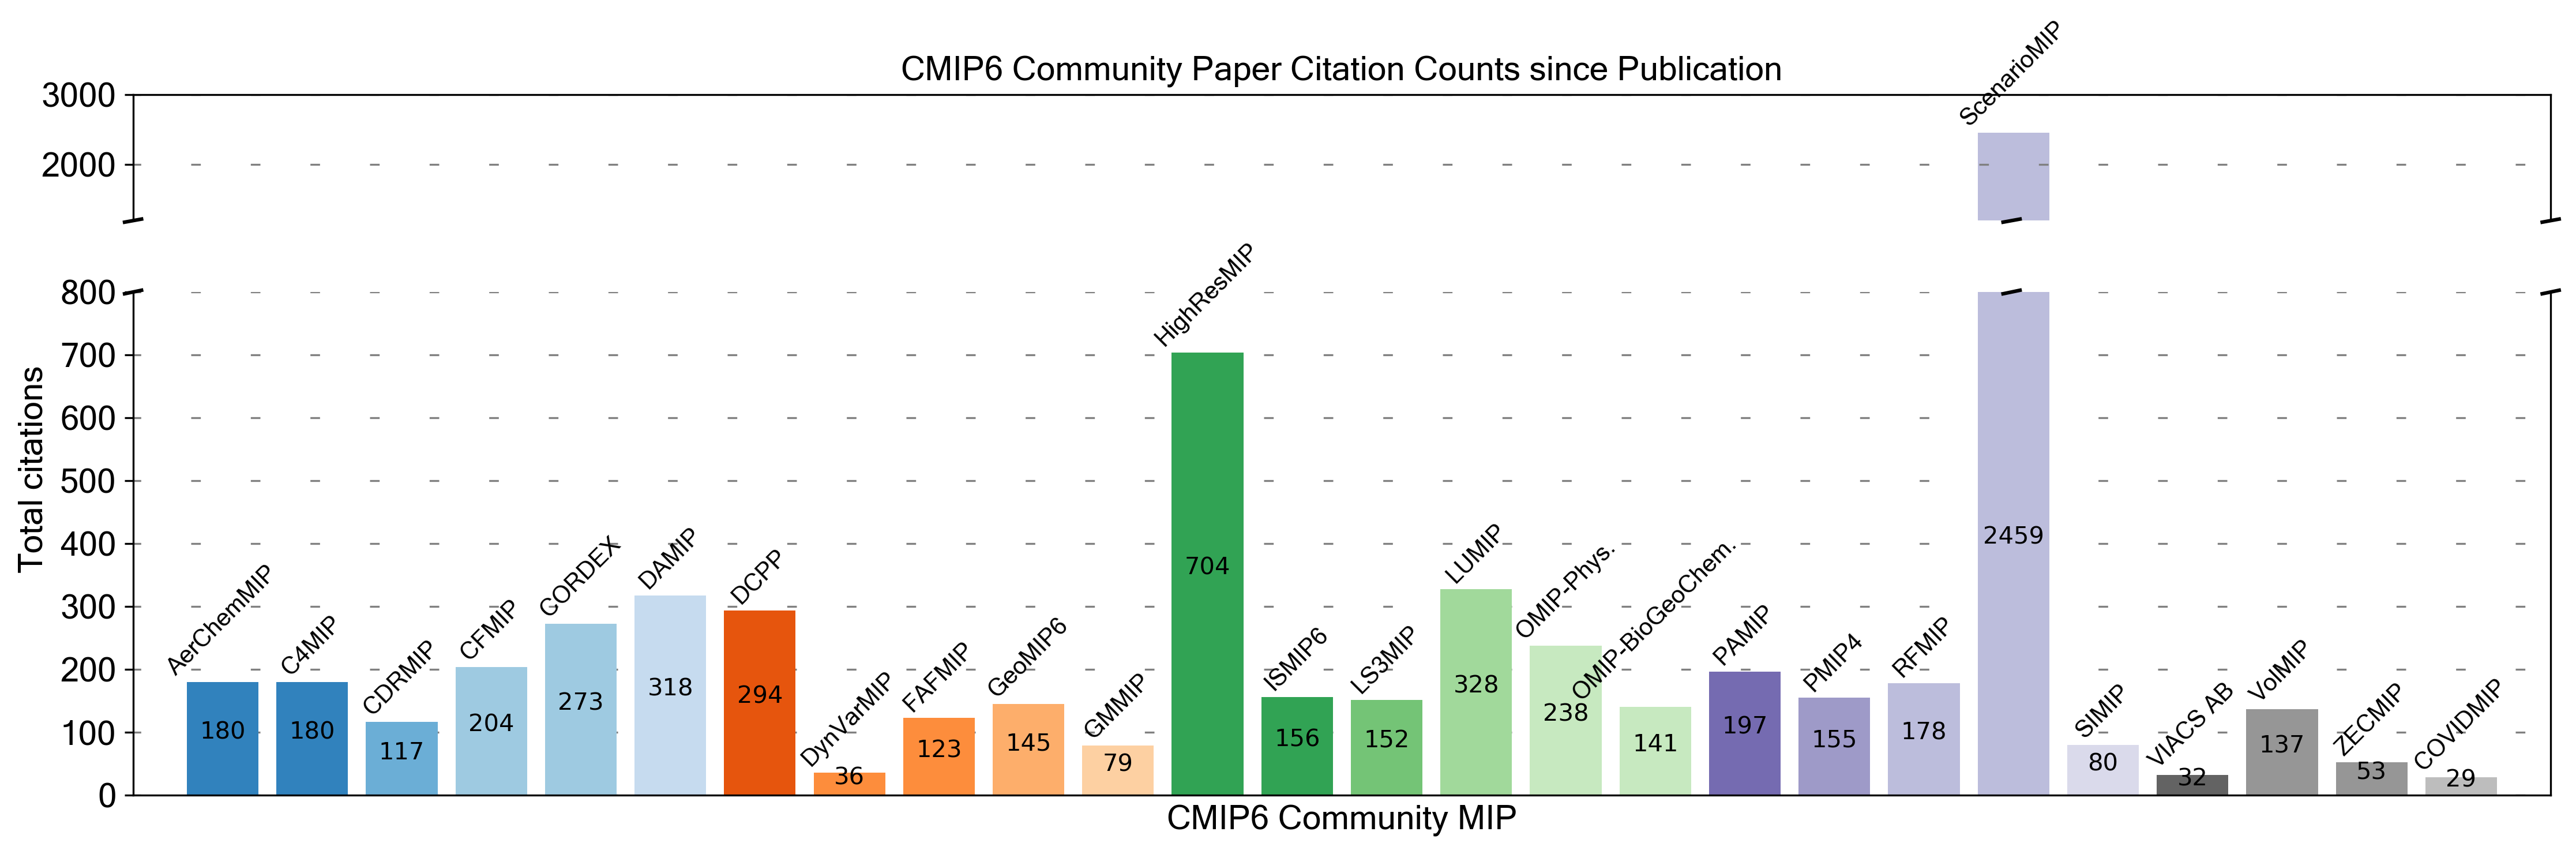

CPU times: user 373 ms, sys: 20 ms, total: 393 ms
Wall time: 391 ms


In [12]:
%%time
fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), dpi=300, ncols=1, nrows=2, sharex=True, gridspec_kw={'height_ratios': [1, 4]})

# sort axis boxes
ax1.spines[['bottom']].set_visible(False)
ax2.spines[['top']].set_visible(False)
ax1.set_ylim(1200, 3000) # 2500 max
ax2.set_ylim(0, 800) # 700 max
ax1.set_xlim(-1, 26)
ax2.set_xlim(-1, 26)
fig.tight_layout()

# fixed values
linesty = (1, (5, 26))
rot = 45
fontName = "Microsoft Sans Serif"
fontSize = 14
fontSizeLab = 10

# create colour bins
NUM_COLORS = 27
colList = []
cm = plt.get_cmap('tab20c')  # also tab 20b, tab20
for i in range(NUM_COLORS):
    colList.append(cm(1.*i/NUM_COLORS))

val = [np.nansum(data["aerchemmip"]["wosPad"]),
       np.nansum(data["c4mip"]["wosPad"]),
       np.nansum(data["cdrmip"]["wosPad"]),
       np.nansum(data["cfmip"]["wosPad"]),
       np.nansum(data["cordex"]["wosPad"]),
       np.nansum(data["damip"]["wosPad"]),
       np.nansum(data["dcpp"]["wosPad"]),
       np.nansum(data["dynvarmip"]["wosPad"]),
       np.nansum(data["fafmip"]["wosPad"]),
       np.nansum(data["geomip6"]["wosPad"]),
       np.nansum(data["gmmip"]["wosPad"]),
       np.nansum(data["highresmip"]["wosPad"]),
       np.nansum(data["ismip6"]["wosPad"]),
       np.nansum(data["ls3mip"]["wosPad"]),
       np.nansum(data["lumip"]["wosPad"]),
       np.nansum(data["omip"]["wosPad"]),
       np.nansum(data["omip2"]["wosPad"]),
       np.nansum(data["pamip"]["wosPad"]),
       np.nansum(data["pmip4"]["wosPad"]),
       np.nansum(data["rfmip"]["wosPad"]),
       np.nansum(data["scenariomip"]["wosPad"]),
       np.nansum(data["simip"]["wosPad"]),
       np.nansum(data["viacsab"]["wosPad"]),
       np.nansum(data["volmip"]["wosPad"]),
       np.nansum(data["zecmip"]["wosPad"]),
       np.nansum(data["covidmip"]["wosPad"])]
labs = ["AerChemMIP", "C4MIP", "CDRMIP", "CFMIP", "CORDEX", "DAMIP", "DCPP",
        "DynVarMIP", "FAFMIP", "GeoMIP6", "GMMIP", "HighResMIP", "ISMIP6", "LS3MIP",
        "LUMIP", "OMIP-Phys.", "OMIP-BioGeoChem.", "PAMIP", "PMIP4", "RFMIP",
        "ScenarioMIP", "SIMIP", "VIACS AB", "VolMIP", "ZECMIP", "COVIDMIP"]
valsum = []
for c,v in enumerate(val):
    tmp = np.nansum(v)
    valsum.append(tmp)

print("valsum:", valsum)
f = "{:5.2f}%"
print("np.nansum(valsum):", np.nansum(valsum))
perc = valsum/np.nansum(valsum) * 100
#print("valsum/np.nansum(valsum):", perc)
print("valsum %:", list(map(f.format,perc)))
print("np.nansum(valsum %):", np.nansum(perc))
print("len(valsum):", len(valsum), "; len(labs):", len(labs))

# Start plotting
b1 = ax1.bar(labs, valsum, color=colList)
b2 = ax2.bar(labs, valsum, color=colList)
# Axis 1
ax1.grid(zorder=0)
ax1.grid(color='gray', linestyle=linesty)
ax1.bar_label(b1, labs, label_type='edge', color='k', rotation=rot, fontsize=fontSizeLab, padding=1, zorder=10, fontname=fontName)
ax1.axes.axes.set_yticklabels(ax1.get_yticklabels(), fontsize=fontSize, fontname=fontName)
# Axis 2
ax2.grid(zorder=0)
ax2.set_axisbelow(True)
ax2.grid(color='gray', linestyle=linesty)
ax2.bar_label(b2, labs, label_type='edge', color='k', rotation=rot, fontsize=fontSizeLab, padding=1, zorder=10, fontname=fontName)
ax2.set_ylabel("Total citations", fontsize=fontSize, fontname=fontName)
ax2.yaxis.set_label_coords(-.035, .65)
ax2.axes.axes.set_yticklabels(ax2.get_yticklabels(), fontsize=fontSize, fontname=fontName)
ax2.set_xlabel("CMIP6 Community MIP", fontsize=fontSize, fontname=fontName)
ax2.set_xticks([])
ax1.set_title("".join(["CMIP6 Community Paper Citation Counts since Publication", ""]), # (to ", datetime.date.today().strftime("%Y-%m-%d"), ")"]),
             fontsize=fontSize, fontname=fontName)
#plt.text(23.75, -35, ' '.join([timeFormat]), fontsize=5)

# function to add value labels
f = "{:0.0f}"
def addlabels(x,y):
    for i in range(len(x)):
        y1 = f.format(y[i])
        if i == 20:
            plt.text(i, 400, y1, ha = "center")
        else:
            plt.text(i, y[i]//2, y1, ha = "center")

addlabels(labs, valsum)

# arguments to pass to the plot, so that we don't keep repeating them
# following https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e
d = .0035  # how big to make the diagonal lines in axes coordinates
scale = 3.5 #350/100  # upper scale more compressed
scenX = 0.777 #.807  # ScenarioMIP x-intercept
kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
ax1.plot((-d, +d), (-d*scale, +d*scale), **kwargs)  # top-left diagonal
ax1.plot((scenX - d, scenX + d), (-d*scale, +d*scale), **kwargs)  # ScenarioMIP diagonal
ax1.plot((1 - d, 1 + d), (-d*scale, +d*scale), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((scenX - d, scenX + d), (1 -d, 1 +d), **kwargs)  # ScenarioMIP diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# fill canvas
fig.tight_layout()

# display, save, close
plt.show()
fig.savefig("_".join([timeFormat, "Fig4.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 5: Recorded downloads by experiment across three phases of CMIP <a class="anchor" id="fig5"></a>

### tabulate input data

| MIP phase | experiment | MIP id | Download #'s % | Cumulative % |
| --- | --- | :---: | :---: | :---: |
| CMIP3 | historical (20C3M) | CMIP/DECK | 38.4 | 38.4 |
| CMIP3 | SRESA1B | ScenarioMIP | 20.5 | 58.9 |
| CMIP3 | piControl (picntrl) | CMIP/DECK | 16.8 | 75.7 |
| CMIP3 | SRESB1 | ScenarioMIP | 6.9 | 82.6 |
| CMIP3 | SRESA2 | ScenarioMIP | 6.8 | 89.4 |
| CMIP3 | 1pctCO2 (1pctto2x) | CMIP/DECK | 4.9 | 94.3 |
| CMIP3 | 3 experiment cumulative | ScenarioMIP | 34.2 | |
| CMIP3 | other | CMIP/DECK, ScenarioMIP, CFMIP | 5.7 | |
| | | | | |
| CMIP5 | rcp85 | ScenarioMIP | 29.6 | 29.6 |
| CMIP5 | historical | CMIP/DECK | 25.7 | 55.3 |
| CMIP5 | rcp45 | ScenarioMIP | 10.7 | 66.0 |
| CMIP5 | piControl | CMIP/DECK | 10.5 | 76.5 |
| CMIP5 | decadal1990 | DCPP | 3.4 | 79.9 |
| CMIP5 | rcp26 | ScenarioMIP | 3.0 | 82.9 |
| CMIP5 | historicalMisc | CMIP/DECK | 2.4 | 85.3 |
| CMIP5 | abrupt-4xCO2 (abrupt4xCO2) | CMIP/DECK | 2.0 | 87.3 |
| CMIP5 | 1pctCO2| CMIP/DECK | 1.6 | 88.9 |
| CMIP5 | historicalNat | DAMIP | 1.4 | 90.3 |
| CMIP5 | 4 experiment cumulative | ScenarioMIP | 44.3 | |
| CMIP5 | other | CMIP/DECK, DCPP, DAMIP, PMIP, C4MIP, CFMIP, RFMIP | 8.7 | |
| | | | | |
| CMIP6 | historical | CMIP/DECK | 30.5 | 30.5 |
| CMIP6 | piControl | CMIP/DECK | 12.6 | 43.1 |
| CMIP6 | ssp245 | ScenarioMIP | 9.1 | 52.2 |
| CMIP6 | ssp585 | ScenarioMIP | 8.9 | 61.1 |
| CMIP6 | ssp370 | ScenarioMIP | 5.6 | 66.7 |
| CMIP6 | ssp126 | ScenarioMIP | 5.6 | 72.3 |
| CMIP6 | dcppA-hindcast | DCPP | 5.4 | 77.7 |
| CMIP6 | abrupt-4xco2 | CMIP/DECK | 2.2 | 79.9 |
| CMIP6 | 1pctCO2 | CMIP/DECK | 2.2 | 82.1 |
| CMIP6 | ssp119 | ScenarioMIP | 2.1 | 84.2 |
| CMIP6 | hist-1950 | HighResMIP | 1.7 | 85.9 |
| CMIP6 | ssp434 | ScenarioMIP | 1.1 | 87.0 |
| CMIP6 | highresSST-present | HighResMIP | 1.1 | 88.1 |
| CMIP6 | amip | CMIP/DECK | 1.1 | 89.2 |
| CMIP6 | ssp460 | ScenarioMIP | 0.8 | 90.0 |
| CMIP6 | control-1950 | HighResMIP | 0.7 | 90.7 |
| CMIP6 | 7 experiment cumulative | ScenarioMIP | 33.0 | |
| CMIP6 | other | CMIP/DECK, ScenarioMIP, DCPP, HighResMIP, PAMIP, PMIP, DAMIP, C4MIP, AerChemMIP, LUMIP, LS3MIP, RFMIP, OMIP, CFMIP, GeoMIP, FAFMIP, CDRMIP, GMMIP, ISMIP6, VolMIP | 8.9 | |

### define input data

In [13]:
# Cutoff >90%
data1 = {
    "CMIP3": [34.2, 38.4, 16.8, 4.9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.7],
    "CMIP5": [43.4, 25.7, 10.5, 1.6, 0, 3.4, 2.0, 2.4, 0, 1.4, 0, 0, 0, 9.6],
    "CMIP6": [33.0, 30.5, 12.6, 2.2, 5.4, 0, 2.2, 0, 1.7, 0, 1.1, 1.1, 0.7, 8.9],
}
labels1 = [
    "ScenarioMIP",
    "historical",
    "piControl",
    "1pctCO2",
    "dcppA-hindcast",
    "decadal1990",
    "abrupt-4xCO2",
    "historicalMisc",
    "hist-1950",
    "historicalNat",
    "amip",
    "highressst-present",
    "control-1950",
    "other",
]
labels_cm3 = [
    "-historical 38.4",
    "-ScenarioMIP 34.2",
    "-piControl 16.8",
    "-1pctCO2 4.9",
    "-other 5.7",
]
labels_cm5 = [
    "-ScenarioMIP 43.4",
    "-historical 25.7",
    "-piControl 10.5",
    "-decadal1990 3.4",
    "-historicalMisc 2.4",
    "-abrupt-4xCO2 2.0",
    "-1pctCO2 1.6",
    "-historicalNat 1.4",
    "-other 9.6",
]
labels_cm6 = [
    "-ScenarioMIP 33.0",
    "-historical 30.5",
    "-piControl 12.6",
    "-dcppA-hindcast 5.4",
    "-abrupt-4xCO2 2.2",
    "-1pctCO2 2.2",
    "-hist-1950 1.7",
    "-highressst-present 1.1",
    "-amip 1.1",
    "-control-1950 0.7",
    "-other 8.9",
]
# Cutoff <90%, top 6 experiments
data2 = {
    "CMIP3": [34.2, 38.4, 16.8, 0, 4.9, 0, 0, 0, 5.7],
    "CMIP5": [44.3, 25.7, 10.5, 0, 0, 3.4, 2.4, 2.0, 11.7],
    "CMIP6": [33.7, 30.5, 12.6, 5.4, 2.2, 0, 0, 2.2, 13.4],
}
labels2 = [
    "ScenarioMIP",
    "historical",
    "piControl",
    "dcppA-hindcast",
    "1pctCO2",
    "decadal1990",
    "historicalMisc",
    "abrupt-4xCO2",
    "other",
]
labels_cm3 = [
    "-historical 38.4",
    "-ScenarioMIP 34.2",
    "-piControl 16.8",
    "-1pctCO2 4.9",
    "-other 5.7",
]  # = 100
labels_cm5 = [
    "-ScenarioMIP 44.3",
    "-historical 25.7",
    "-piControl 10.5",
    "-decadal1990 3.4",
    "-historicalMisc 2.4",
    "-abrupt-4xCO2 2.0",
    "-other 11.7",
]  # = 100
labels_cm6 = [
    "-ScenarioMIP 33.7",
    "-historical 30.5",
    "-piControl 12.6",
    "-dcppA-hindcast 5.4",
    "-abrupt-4xCO2 2.2",
    "-1pctCO2 2.2",
    "-other 13.4",
]  # = 100

### plot

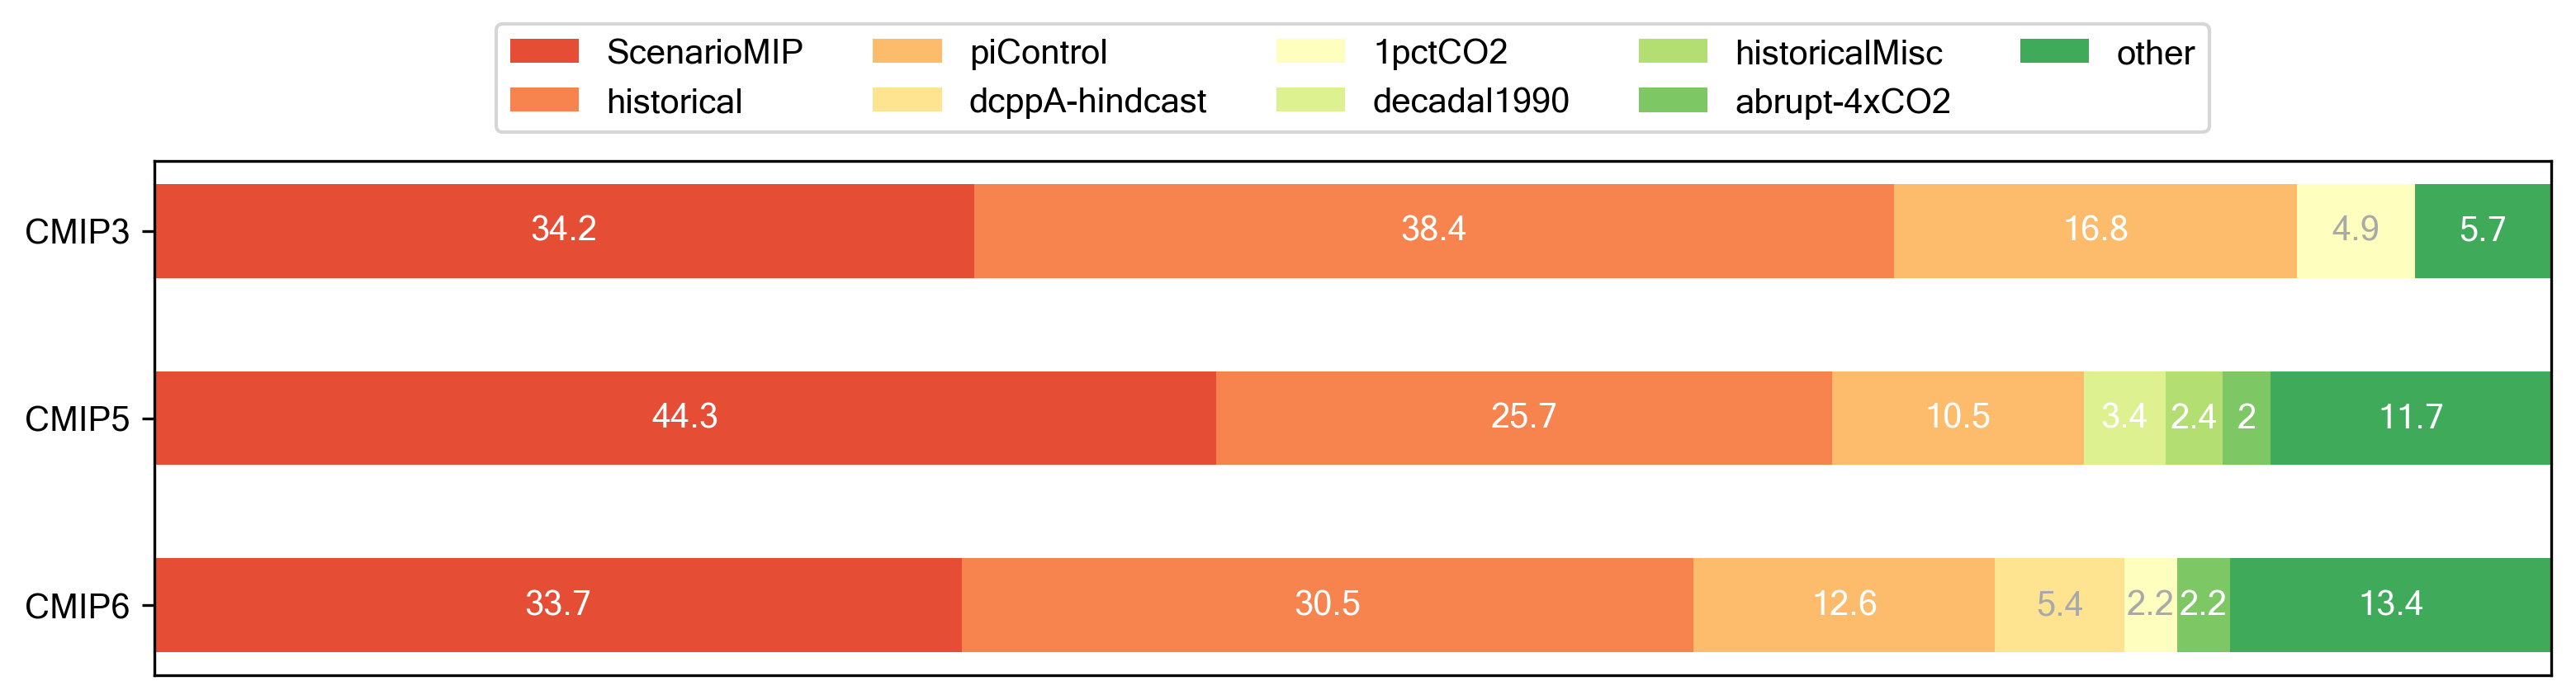

In [14]:
fontName = "Microsoft Sans Serif"
fontSize = 10
dataKeys = list(data2.keys())
dataNp = np.array(list(data2.values()))
dataCumul = dataNp.cumsum(axis=1)
labelColours = plt.colormaps["RdYlGn"](np.linspace(0.15, 0.85, dataNp.shape[1]))

fig, ax = plt.subplots(figsize=(10.5, 3), dpi=300)  # 8.5 x 11 inches US letter
ax.invert_yaxis()
ax.xaxis.set_visible(False)
plt.yticks(fontname=fontName)
ax.set_xlim(0, np.sum(dataNp, axis=1).max())

for i, (colname, color) in enumerate(zip(labels2, labelColours)):
    widths = dataNp[:, i]
    starts = dataCumul[:, i] - widths
    rects = ax.barh(
        dataKeys, widths, left=starts, height=0.5, label=colname, color=color
    )
    # remove 0 labels
    tmp = copy.deepcopy(rects.datavalues)
    tmp[tmp == 0] = np.nan
    rects.datavalues = tmp
    r, g, b, _ = color
    text_color = "white" if r * g * b < 0.5 else "darkgrey"
    ax.bar_label(rects, label_type="center", color=text_color, fontname=fontName)

ax.legend(
    ncols=5,
    bbox_to_anchor=(0.5, 1.3),
    loc="upper center",
    prop={"family": fontName, "size": fontSize},
)  # fontsize='small',

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat, "Fig5.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure 6: A time history of MIPs and their broader impact <a class="anchor" id="fig6"></a>¶

![title](241115_durack1-AMIP-CMIP-IPCC-Impact-trim-large.png)

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>

### Figure A1: Recorded downloads by MIP across three phases of CMIP <a class="anchor" id="figA1"></a>

### tabulate input data

| MIP phase | experiment/experiment count | MIP id | Download #'s % |
| --- | --- | :---: | :---: |
| CMIP3 | historical (20C3M) | CMIP/DECK | 38.4 |
| CMIP3 | SRESA1B | ScenarioMIP | 20.5 |
| CMIP3 | piControl (picntrl) | CMIP/DECK | 16.8 |
| CMIP3 | SRESB1 | ScenarioMIP | 6.9 |
| CMIP3 | SRESA2 | ScenarioMIP | 6.8 |
| CMIP3 | 1pctCO2 (1pctto2x) | CMIP/DECK | 4.9 |
| CMIP3 | 1pctCO2 (1pctto4x) | CMIP/DECK | 2.2 |
| CMIP3 | commit | ScenarioMIP | 1.1 |
| CMIP3 | amip | CMIP/DECK | 0.8 |
| CMIP3 | pdcntrl | CMIP/DECK | 0.7 |
| CMIP3 | 2xco2 | CFMIP | 0.4 |
| CMIP3 | slabcntl | CFMIP | 0.4 |
| CMIP3 | 3 experiment cumulative | ScenarioMIP | 34.2 |
| CMIP3 | other (excluding top 6 experiments) | CMIP/DECK, ScenarioMIP, CFMIP | 5.7 |
| | | | |
| CMIP5 | 4 | ScenarioMIP | 44.3 |
| CMIP5 | 5 | CMIP/DECK | 40.9 |
| CMIP5 | 65 | DCPP | 6.4 |
| CMIP5 | 4 | DAMIP | 5.3 |
| CMIP5 | 3 | PMIP | 1.8 |
| CMIP5 | 7 | C4MIP | 0.8 |
| CMIP5 | 9 | CFMIP | 0.3 |
| CMIP5 | 4 | RFMIP | 0.3 |
| CMIP5 | other (excluding top 4 MIPs) | PMIP, C4MIP, CFMIP, RFMIP | 3.1 |
| | | | |
| CMIP6 | 9 | CMIP/DECK | 49.2 |
| CMIP6 | 8 | ScenarioMIP | 33.7 |
| CMIP6 | 23 | DCPP | 6.0 |
| CMIP6 | 6 | HighResMIP | 4.5 |
| CMIP6 | 21 | PAMIP | 1.6 |
| CMIP6 | 6 | PMIP | 1.0 |
| CMIP6 | 15 | DAMIP | 1.0 |
| CMIP6 | 12 | C4MIP | 0.8 |
| CMIP6 | 38 | AerChemMIP | 0.7 |
| CMIP6 | 18 | LUMIP | 0.4 |
| CMIP6 | 7 | LS3MIP | 0.4 |
| CMIP6 | 15 | RFMIP | 0.3 |
| CMIP6 | 2 | OMIP | 0.2 |
| CMIP6 | 24 | CFMIP | 0.1 |
| CMIP6 | 4 | GeoMIP | 0.1 |
| CMIP6 | 8 | FAFMIP | 0.1 |
| CMIP6 | 5 | CDRMIP | 0.0 |
| CMIP6 | 6 | GMMIP | 0.0 |
| CMIP6 | 5 | ISMIP6 | 0.0 |
| CMIP6 | 2 | VolMIP | 0.0 |
| CMIP6 | other (excluding top 4 MIPs) | PAMIP, DAMIP, C4MIP, AerChemMIP, LUMIP, LS3MIP, RFMIP, OMIP, CFMIP, GeoMIP, FAFMIP, CDRMIP, GMMIP, ISMIP6, VolMIP | 6.6 |

### define input data

In [15]:
# Cutoff >=4.5%
data1 = {
    "CMIP3": [38.4, 20.5, 16.8, 6.9, 6.8, 4.9, 5.7],  # = 100
    "CMIP5": [44.3, 40.9, 6.4, 5.3, 3.1],  # = 100
    "CMIP6": [49.2, 33.7, 6.0, 4.5, 6.6],  # = 100
}
labelsCm3 = [
    "historical 38.4%",
    "SRESA1B 20.5%",
    "piControl 16.8%",
    " SRESB1 6.9%",
    "SRESA2 6.8%",
    "1pctCO2 4.9%",
    "other 5.7%",
]
labelsCm5 = [
    "ScenarioMIP 44.3%",
    "CMIP/DECK 40.9%",
    "DCPP 6.4%",
    "DAMIP 5.3%",
    "other 3.1%",
]
labelsCm6 = [
    "CMIP/DECK 49.2%",
    "ScenarioMIP 33.7%",
    "DCPP 6.0%",
    "HighResMIP 4.5%",
    "other 6.6%",
]

### plot

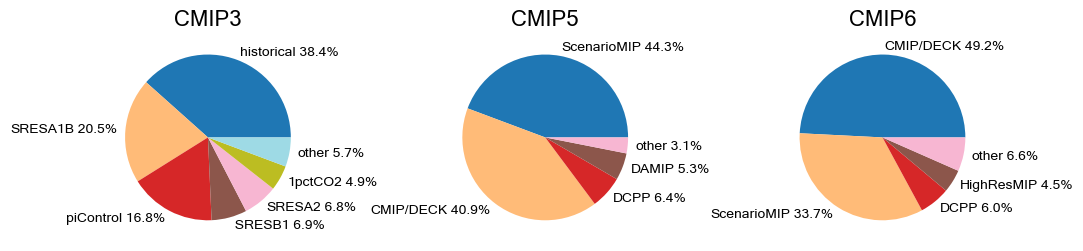

In [16]:
# Set fonts and sizes
fontName = "Microsoft Sans Serif"
fontSize = 16
# select colourmap
cmap = plt.get_cmap("tab20")

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(10.75, 3))

# Plot the first pie chart
axes[0].pie(
    data1["CMIP3"],
    labels=labelsCm3,
    textprops={"fontname": fontName},
    colors=cmap(np.linspace(0, 1, len(data1["CMIP3"]))),
)  # , autopct='%1.1f%%')
axes[0].set_title("CMIP3", fontname=fontName, fontsize=fontSize)

# Plot the second pie chart
axes[1].pie(
    data1["CMIP5"],
    labels=labelsCm5,
    textprops={"fontname": fontName},
    colors=cmap(np.linspace(0, 1, len(data1["CMIP3"]))),
)
axes[1].set_title("CMIP5", fontname=fontName, fontsize=fontSize)

# Plot the third pie chart
axes[2].pie(
    data1["CMIP6"],
    labels=labelsCm6,
    textprops={"fontname": fontName},
    colors=cmap(np.linspace(0, 1, len(data1["CMIP3"]))),
)
axes[2].set_title("CMIP6", fontname=fontName, fontsize=fontSize)

# fill canvas
fig.tight_layout()

# display, save, and close
plt.show()
fig.savefig("_".join([timeFormat, "FigA1.svg"]), format="svg")

<div align=right>
<a href=figuresAndTables.ipynb#top>Go back to Top</a>
</div>